In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

# Import API key
from api_keys import api_key

In [2]:
# read in csv
oscar_data= pd.read_csv("Resources/oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# reduce csv to get just the winners/nominees for any given year
all_nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]
all_nominees

,Year,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4
0,1927/28,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness
1,1928/29,The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot
2,1929/30,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade
3,1930/31,Cimarron,East Lynne,The Front Page,Skippy,Trader Horn
4,1931/32,Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final
...,...,...,...,...,...,...
91,2019,Parasite,1917,Ford v Ferrari,The Irishman,Jojo Rabbit
92,2020,Nomadland,The Father,Judas and the Black Messiah,Mank,Minari
93,2021,CODA,Belfast,Don't Look Up,Drive My Car,Dune
94,2022,Everything Everywhere All At Once,All Quiet on the Western Front,Avatar: The Way of Water,The Banshees of Inisherin,Elvis


In [4]:
base_url = "https://api.themoviedb.org/3/"

# date parameters
startdate = "2022-11-01"
enddate = "2022-12-01"

# request json from API. The request includes parameters for date and language (English language films only)
all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()

# the json has more than 1 page, so to parse through it, we need to use a "for loop" to loop through each page but first we need to determine how many pages there are. This can be found in one of the keys of the response json.
total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)
print(total_pages)

96


In [5]:
# create empty lists for movie ids, titles, votes, and release dates.
movie_ids = []
titles = []
votes = []
release_dates = []

# "for loop" to loop through each page of the response json.
for i in range(1,int(total_pages)+1):
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}&page={i}').json()
    
    # second "for loop" to loop through the page, retrieve all the necessary info, and append to the empty lists.
    for i in range(len(all_movies_response["results"])):

        movie_id = all_movies_response["results"][i]["id"]
        title = all_movies_response["results"][i]["original_title"]
        vote = all_movies_response["results"][i]["vote_average"]
        release_date = all_movies_response["results"][i]["release_date"]

        movie_ids.append(movie_id)
        titles.append(title)
        votes.append(vote)
        release_dates.append(release_date)

In [6]:
len(movie_ids)

1916

In [7]:
# creating a dataframe of the json data, using Pandas.
df = pd.DataFrame({"ID" : movie_ids,
                   "Title" : titles,
                   "Vote" : votes,
                   "Release Date" : release_dates})
df

,ID,Title,Vote,Release Date
0,505642,Black Panther: Wakanda Forever,7.142,2022-11-09
1,661374,Glass Onion: A Knives Out Mystery,7.052,2022-11-12
2,593643,The Menu,7.190,2022-11-17
3,804095,The Fabelmans,7.650,2022-11-11
4,338958,Disenchanted,6.793,2022-11-18
...,...,...,...,...
1911,941933,Myth,0.000,2022-12-01
1912,937538,A Change in Time,0.000,2022-11-26
1913,929619,Black Hole Legion,0.000,2022-11-15
1914,899023,This Town Still Talks About You,0.000,2022-11-18


In [8]:
# The values for release date are categorised as strings, not integers. I'm not sure how to mass convert them to integers, but for now, we can just sort them instead.
df = df.sort_values("Release Date")
df = df.reset_index(drop=True)
df["Nominated"] = ""
df


,ID,Title,Vote,Release Date,Nominated
0,1083580,A90,0.000,2022-11-01,
1,1216213,The Son Of,0.000,2022-11-01,
2,826777,The Sleep Experiment,5.143,2022-11-01,
3,1119484,Kathy & Jeb,0.000,2022-11-01,
4,1122268,Into The Well: 100 Miles. 32 Hours. 200 Racers.,0.000,2022-11-01,
...,...,...,...,...,...
1911,1113680,Full Circle,0.000,2022-12-01,
1912,1114296,The End,0.000,2022-12-01,
1913,1114303,Palms,0.000,2022-12-01,
1914,1100991,Three Moons,0.000,2022-12-01,


In [9]:
# how to get the winner/nominees for a given year. Could use this code or something like it later.
nominees = all_nominees.loc[all_nominees["Year"] == "2022",["Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]
nominees

,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4
94,Everything Everywhere All At Once,All Quiet on the Western Front,Avatar: The Way of Water,The Banshees of Inisherin,Elvis


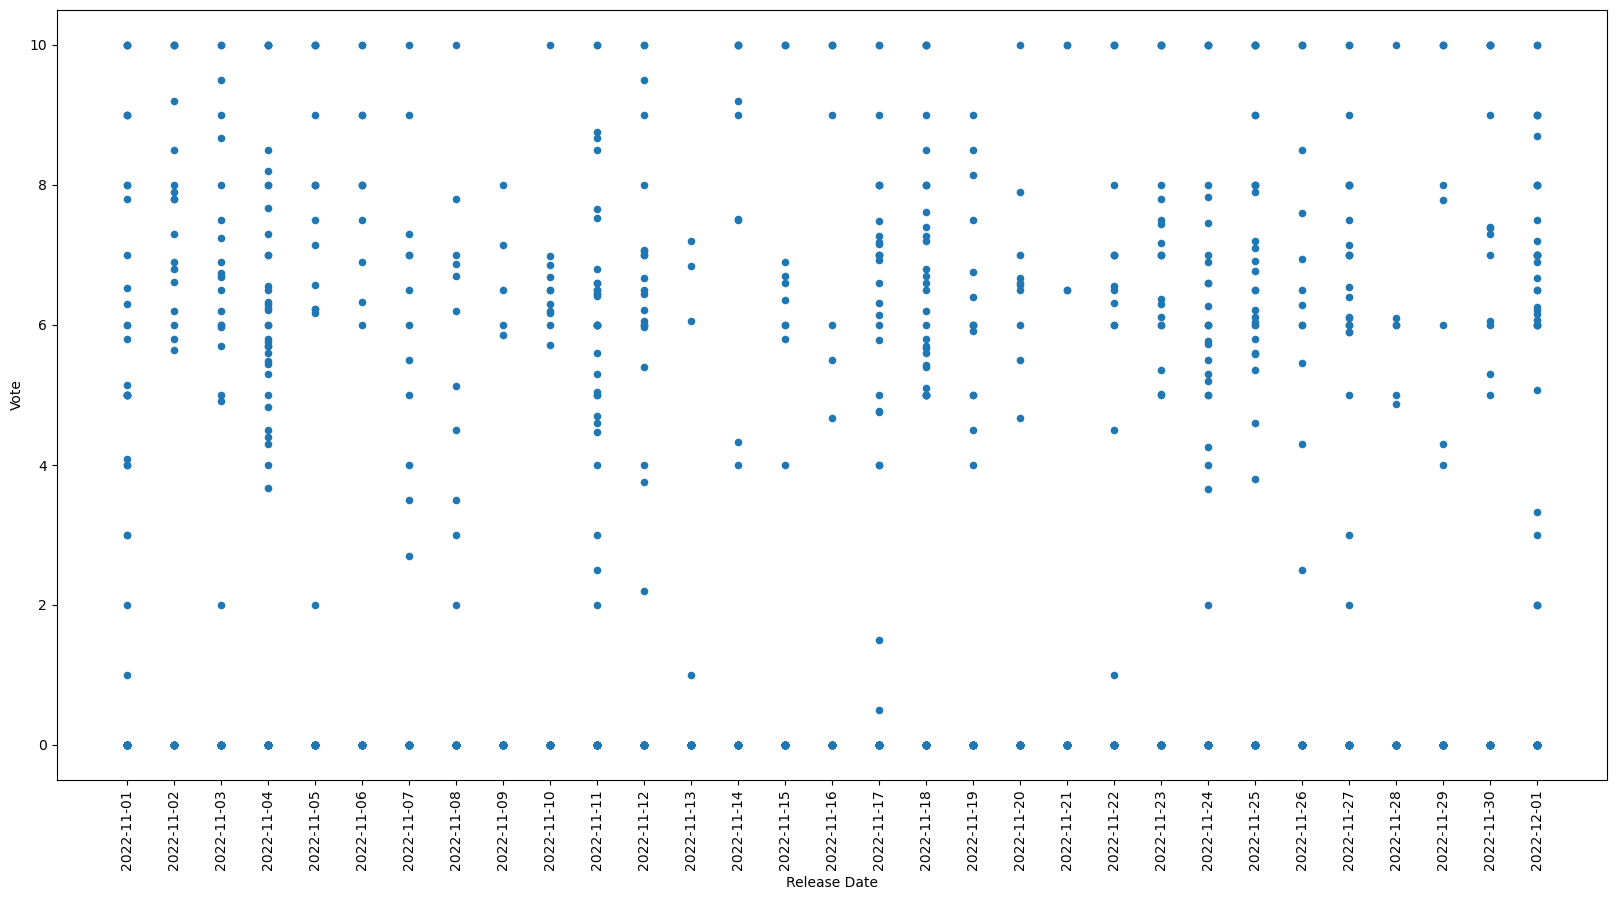

In [10]:
# scatter plot needs work.
df.plot(kind="scatter", x="Release Date", y="Vote", rot=90, figsize=(20,10))
plt.show()